# <center>${\textbf{Artificial Intelligence Decision Support System}}$<br>${\textbf{ for Groundwater Management under Climate Change:}}$</center><br><center>${\textbf{ Application to Mornag Region in Tunisia}}$</center><br><center>${\textbf{Part 4 : Deployment Using LSTM}}$</center>


**Table of Contents**
* [Importing Libraries](#libraris)
* [Forecasting under Climate Change scenarios](#cc)
    * [Representative Concentration Pathway :RCP 4.5](#rcp4.5_1)
    * [Representative Concentration Pathway :RCP 8.5](#rcp8.5_1)
* [Analysis](#Analysis)


    

<a id="libraries"></a>

${\textbf{Importing Libraries}}$

In [55]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

import pickle

import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
import matplotlib.pyplot as plt

from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 


In [56]:
Historical_Data = pd.read_pickle('./Pickles/Data/Historical_Data.pkl')
LSTM = tf.keras.models.load_model('./Pickles/Models/LSTMPerfect.h5', compile=False)

In [57]:
from tensorflow.keras.utils import plot_model

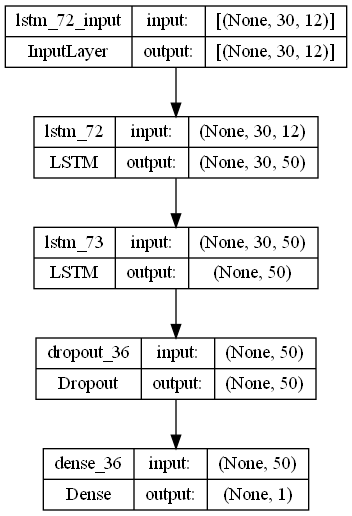

In [28]:
dot_img_file = '/tmp/model_1.png'
plot_model(LSTM, to_file=dot_img_file, show_shapes=True)

<a id="cc"></a>

## ${\textbf{LSTM Forecasting under Climate Change scenarios}}$

In [58]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

<a id="rcp4.5_1"></a>

>${\textbf{Representative Concentration Pathway :RCP 4.5 }}$

In [59]:
RCP45 = pd.read_pickle('./Pickles/Data/RCP45.pkl')
del RCP45['MonthlyRF']
RCP45.rename(columns = {'Mean':'MonthlyRF'}, inplace = True)#Renaming Zone_num to zone for more clarity

In [60]:
RCP45['MonthlyRF'].max()

99.7909090909091

In [61]:
del RCP45['Lat']
del RCP45['Lon']
del RCP45['Lat_Pluviometer']
del RCP45['Lon_Pluviometer']

In [62]:
lb_make = LabelEncoder()
RCP45["Piezometer"] = lb_make.fit_transform(RCP45["Piezometer"])
lb_make1 = LabelEncoder()
RCP45["Pluviometer"] = lb_make1.fit_transform(RCP45["Pluviometer"])
lb_make2 = LabelEncoder()
RCP45["SPI_classes"] = lb_make2.fit_transform(RCP45["SPI_classes"])
RCP45['Pz']=0

In [63]:
scaler = MinMaxScaler(feature_range=(0,1))
RCP45_scaled = scaler.fit_transform(RCP45)

In [66]:
X,Y=createXY(RCP45_scaled,30)

In [67]:
prediction=LSTM.predict(X)
prediction_copies_array = np.repeat(prediction,12, axis=-1)
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),12)))[:,0]

RCP45["Piezometer"] = lb_make.inverse_transform(RCP45["Piezometer"])
RCP45["Pluviometer"] = lb_make1.inverse_transform(RCP45["Pluviometer"])
RCP45["SPI_classes"] = lb_make2.inverse_transform(RCP45["SPI_classes"])
RCP45=RCP45[30:]
RCP45["Pz"]=pred

5382/5382 [==============================] - 22s 4ms/step


In [68]:
RCP45

,Piezometer,Pluviometer,YearlyRF,SemestrialRF,TrimestrialRF,MonthlyRF,Zone,SPI,SPI_classes,Month,Year,Pz
date,,,,,,,,,,,,
2009-06-01,Ben Zazia,BEN AROUS I MUNICIPA,411.898182,273.444545,114.956364,50.622727,4,1.081351,Very wet,6,2009,28.612494
2009-06-01,Fraj,BEN AROUS I MUNICIPA,411.898182,273.444545,114.956364,50.622727,4,1.081351,Very wet,6,2009,18.943916
2009-06-01,Bir El Kif,BEN AROUS I MUNICIPA,411.898182,273.444545,114.956364,50.622727,4,1.081351,Very wet,6,2009,14.542791
2009-06-01,El Attar,BEN AROUS I MUNICIPA,411.898182,273.444545,114.956364,50.622727,4,1.081351,Very wet,6,2009,11.967786
2009-06-01,Majoul,BEN AROUS I MUNICIPA,411.898182,273.444545,114.956364,50.622727,4,1.081351,Very wet,6,2009,13.266762
...,...,...,...,...,...,...,...,...,...,...,...,...
2100-12-01,UCP Ouzra,OUZRA AGRI FLORA,278.813636,132.886364,89.221818,29.188182,1,-0.161186,Moderately dry,12,2100,12.568875
2100-12-01,Salah Khamar,OUZRA AGRI FLORA,278.813636,132.886364,89.221818,29.188182,1,-0.161186,Moderately dry,12,2100,27.055840
2100-12-01,Haj Hadi Jani,OUZRA AGRI FLORA,278.813636,132.886364,89.221818,29.188182,1,-0.161186,Moderately dry,12,2100,34.532608


<a id="rcp8.5_1"></a>

>${\textbf{Representative Concentration Pathway :RCP 8.5 }}$

In [69]:
RCP85 = pd.read_pickle('./Pickles/Data/RCP85.pkl')
del RCP85['MonthlyRF']
RCP85.rename(columns = {'Mean':'MonthlyRF'}, inplace = True)#Renaming Zone_num to zone for more clarity

In [70]:
del RCP85['Lat']
del RCP85['Lon']
del RCP85['Lat_Pluviometer']
del RCP85['Lon_Pluviometer']

In [71]:
lb_make = LabelEncoder()
RCP85["Piezometer"] = lb_make.fit_transform(RCP85["Piezometer"])
lb_make1 = LabelEncoder()
RCP85["Pluviometer"] = lb_make1.fit_transform(RCP85["Pluviometer"])
lb_make2 = LabelEncoder()
RCP85["SPI_classes"] = lb_make2.fit_transform(RCP85["SPI_classes"])
RCP85['Pz']=0

In [72]:
scaler = MinMaxScaler(feature_range=(0,1))
RCP85_scaled = scaler.fit_transform(RCP85)

In [73]:
X,Y=createXY(RCP85_scaled,30)

In [74]:
prediction=LSTM.predict(X)
prediction_copies_array = np.repeat(prediction,12, axis=-1)
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),12)))[:,0]

RCP85["Piezometer"] = lb_make.inverse_transform(RCP85["Piezometer"])
RCP85["Pluviometer"] = lb_make1.inverse_transform(RCP85["Pluviometer"])
RCP85["SPI_classes"] = lb_make2.inverse_transform(RCP85["SPI_classes"])
RCP85=RCP85[30:]
RCP85["Pz"]=pred

5382/5382 [==============================] - 20s 4ms/step


In [75]:
RCP85[RCP85.Piezometer=='UCP Ennajah_484']

,Piezometer,Pluviometer,YearlyRF,SemestrialRF,TrimestrialRF,MonthlyRF,Zone,SPI,SPI_classes,Month,Year,Pz
date,,,,,,,,,,,,
2009-01-01,UCP Ennajah_484,FOUCHANA FERME GAMOU,354.381818,216.021818,134.808182,28.776364,3,-0.113993,Moderately dry,1,2009,29.394350
2009-02-01,UCP Ennajah_484,FOUCHANA FERME GAMOU,354.381818,216.021818,134.808182,42.771818,3,0.717884,Moderately Wet,2,2009,28.519882
2009-03-01,UCP Ennajah_484,FOUCHANA FERME GAMOU,354.381818,216.021818,134.808182,63.260000,3,1.935683,Very wet,3,2009,28.592644
2009-04-01,UCP Ennajah_484,FOUCHANA FERME GAMOU,354.381818,216.021818,81.213636,18.864545,3,-0.703142,Moderately dry,4,2009,30.220552
2009-05-01,UCP Ennajah_484,FOUCHANA FERME GAMOU,354.381818,216.021818,81.213636,30.001818,3,-0.041153,Moderately dry,5,2009,29.784496
...,...,...,...,...,...,...,...,...,...,...,...,...
2100-08-01,UCP Ennajah_484,MORNEG FERME ESSADIR,222.970909,100.570909,32.280909,11.743636,3,-1.126402,Severely dry,8,2100,30.793724
2100-09-01,UCP Ennajah_484,MORNEG FERME ESSADIR,222.970909,100.570909,32.280909,14.476364,3,-0.963971,Moderately dry,9,2100,30.484846
2100-10-01,UCP Ennajah_484,MORNEG FERME ESSADIR,222.970909,100.570909,68.290000,20.682727,3,-0.595071,Moderately dry,10,2100,29.814817


<a id="Analysis"></a>

${\textbf{Analysis }}$

Ben Zazia


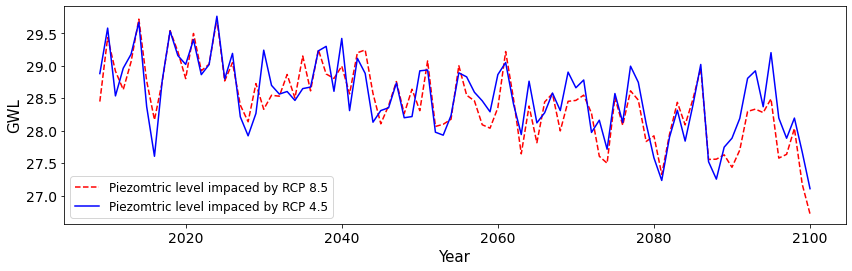

Fraj


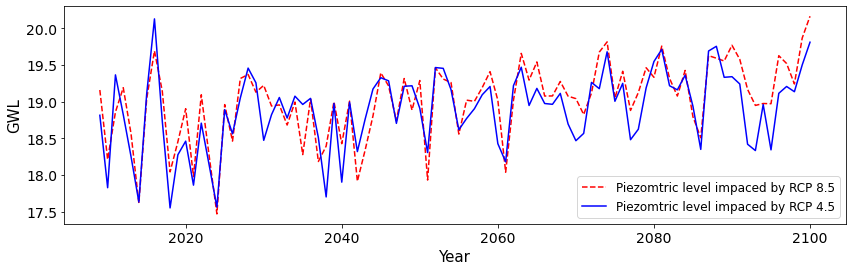

Bir El Kif


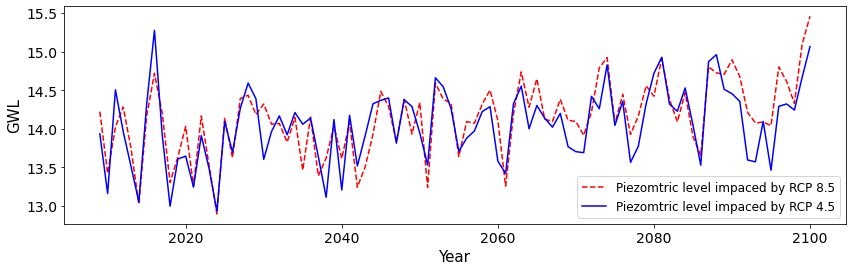

El Attar


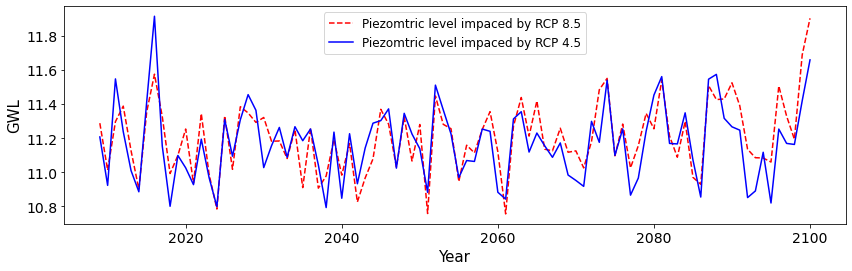

Majoul


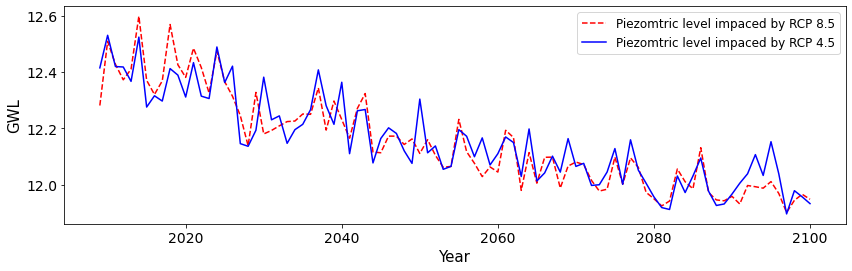

Puits Public_5779


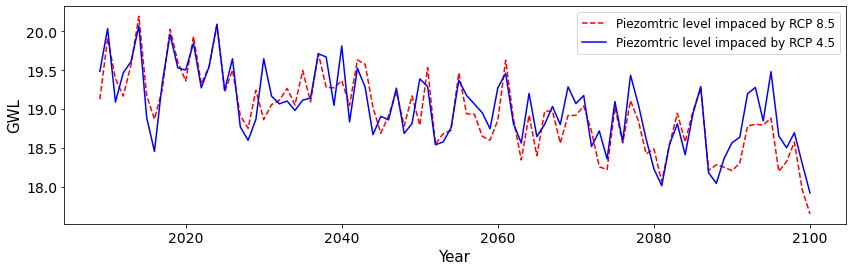

Hachmi Allagui


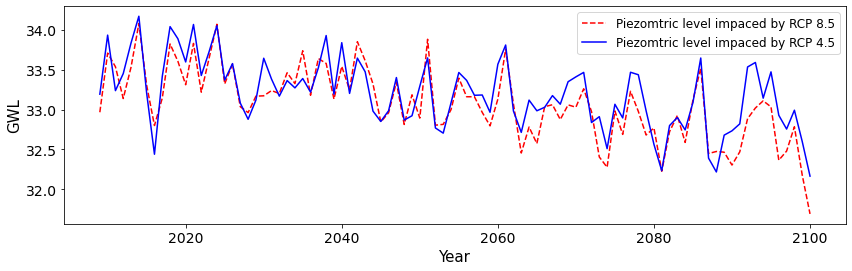

G.O.V.P.F


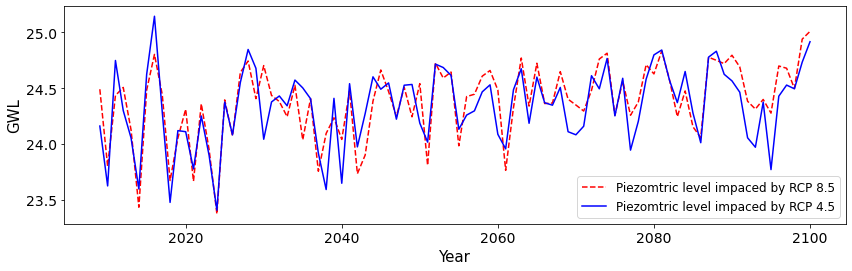

Mzabi


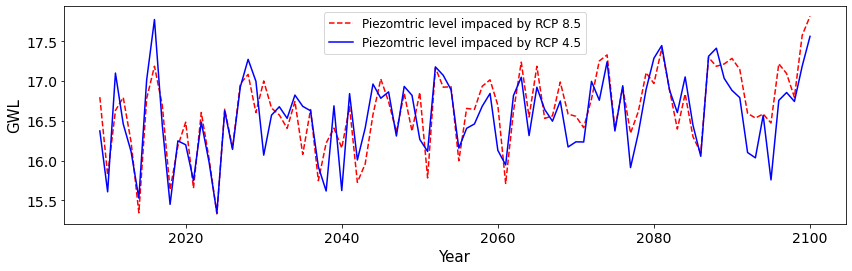

Naceur Dababi


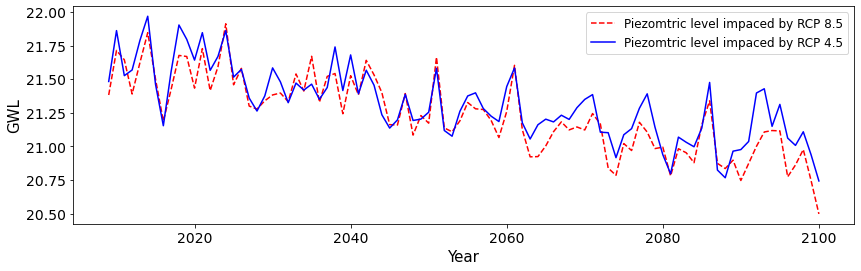

INRAT


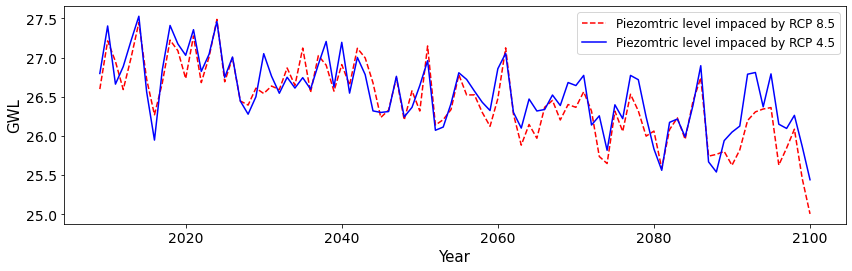

Mohamed Ben Nouiji


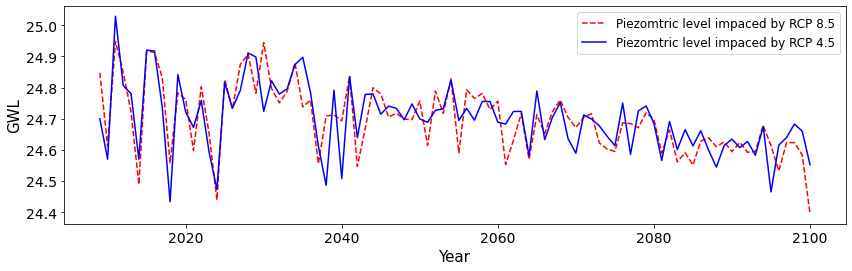

UCP Errissala_B


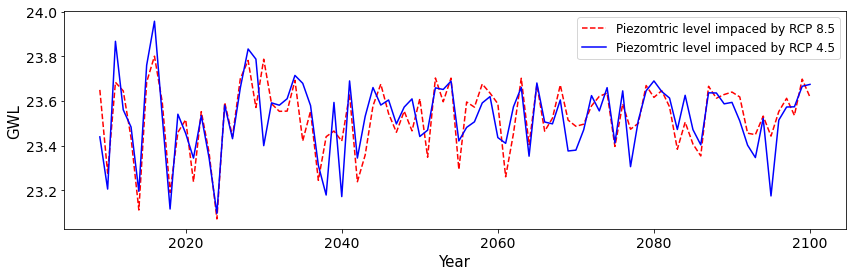

Ben Khalifa


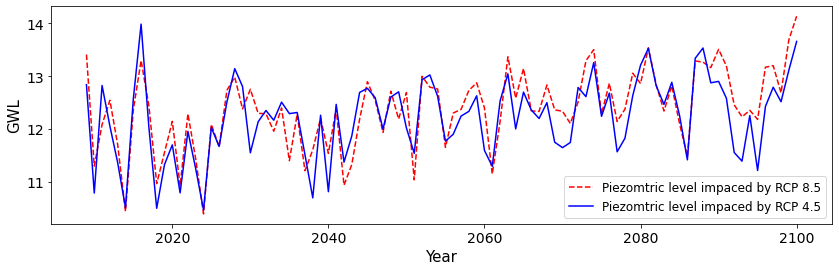

Usine Curamique


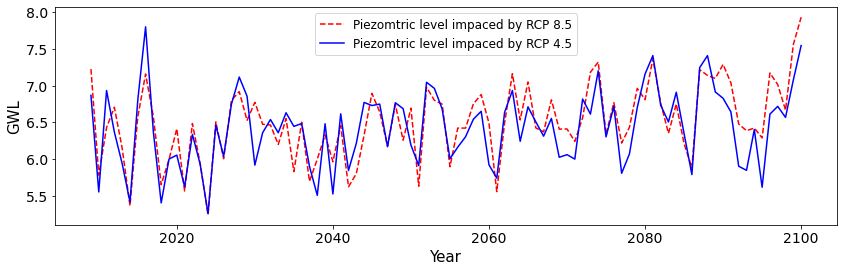

Mohamed Boutnini


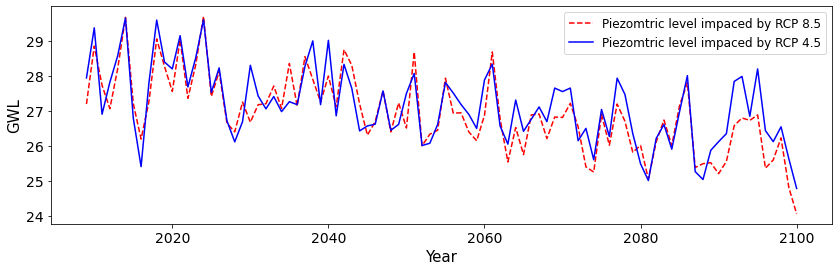

INAT Zaouia


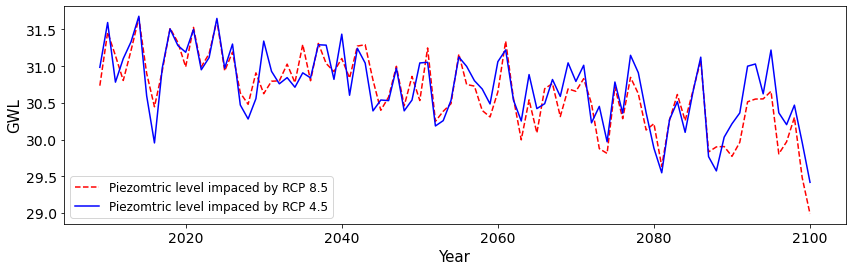

Ali El Almi


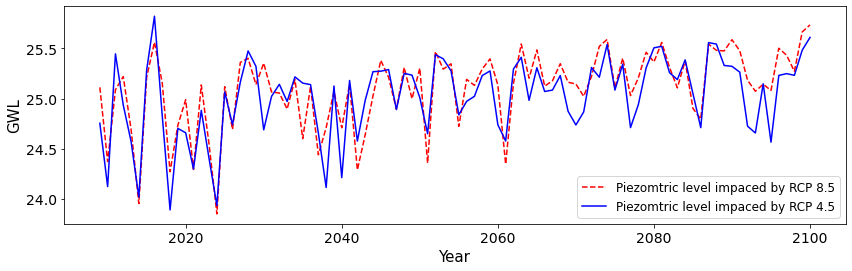

Bel Hassen Sahli


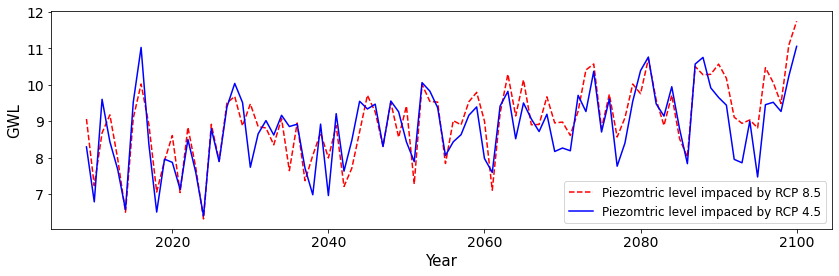

Azzouz El Bahri 1


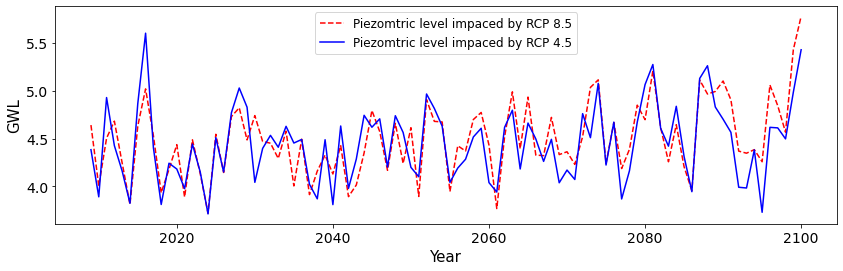

Haj Meftah Allagui


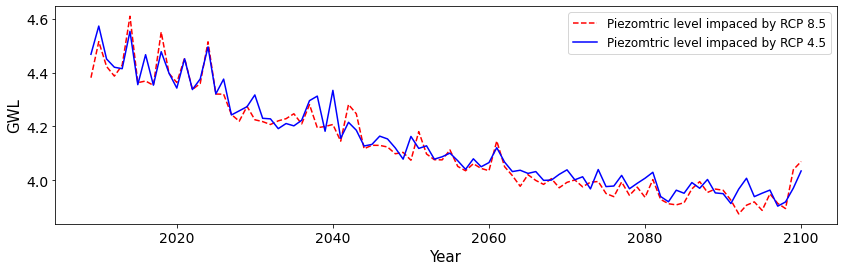

Salah Meziene


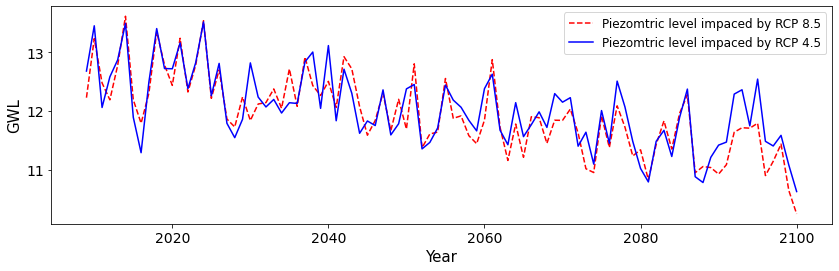

UCP Sidi Daoud


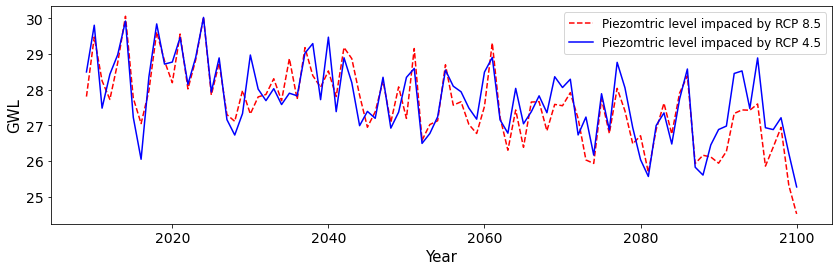

Hamadi Belarbi


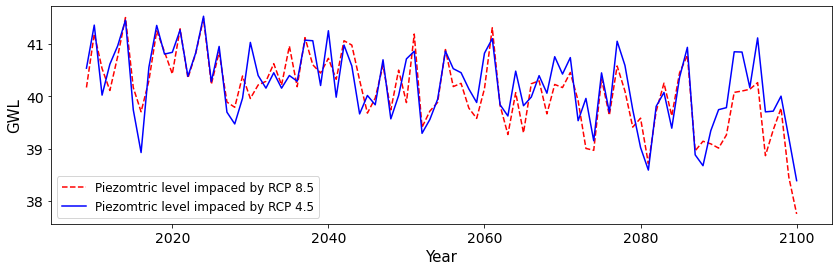

UCP Ennajah_484


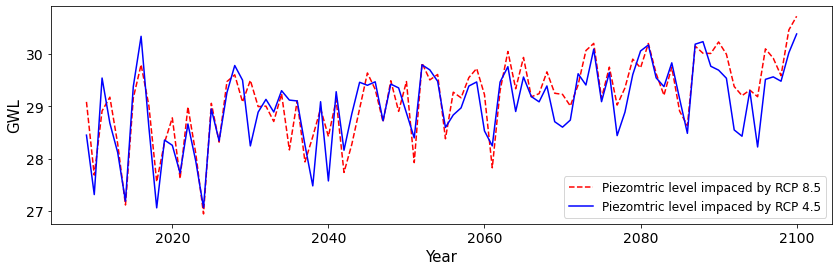

UCP Ennajah_494


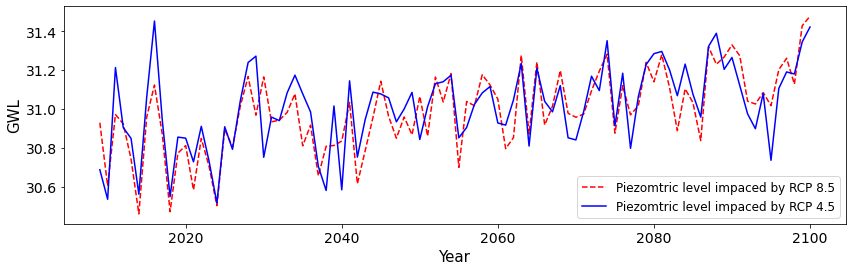

Ali et Med Bel Arbi


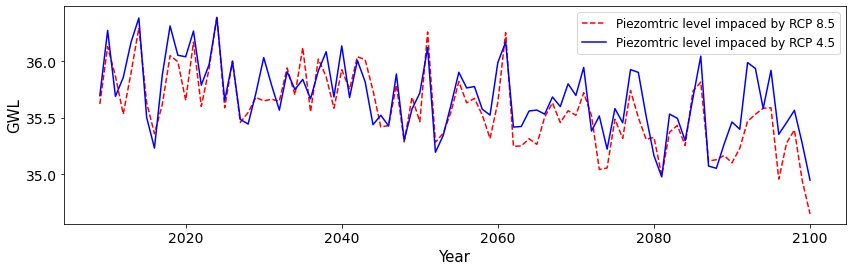

UCP Errissala_620


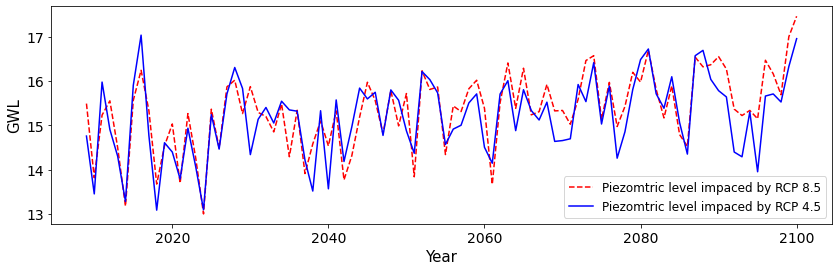

Puit OTD


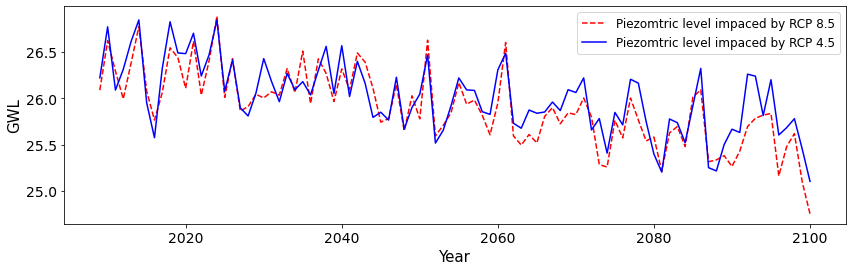

Sadok Belaid


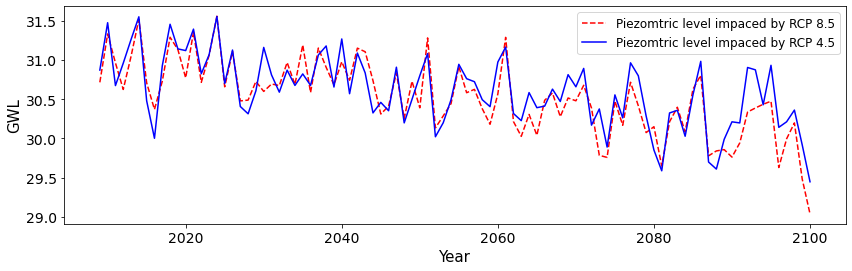

Huritier Sgaier


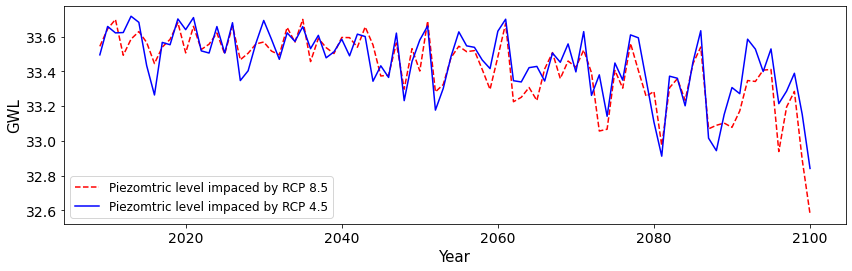

Puits Public_3292


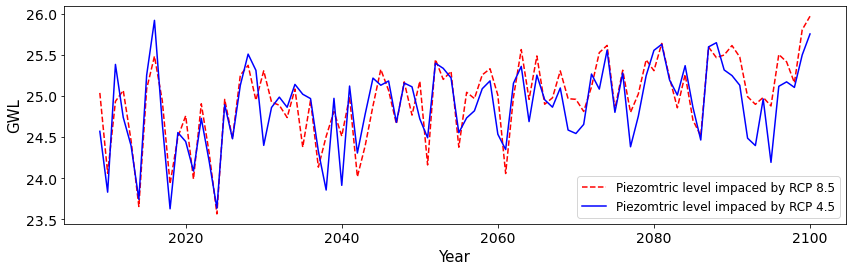

B. Abdallah


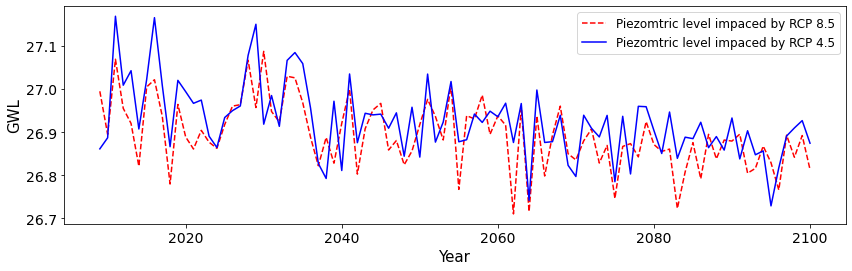

Puits public_6582


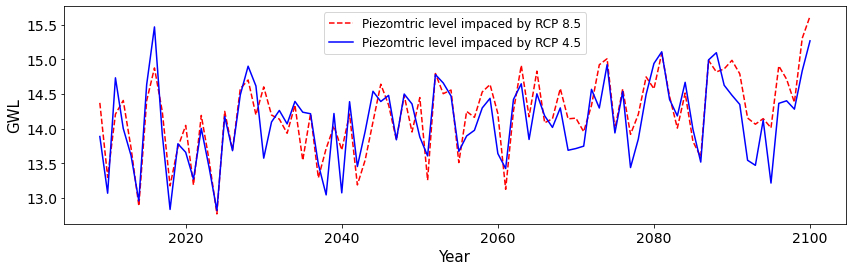

Mohamed ben Rouis


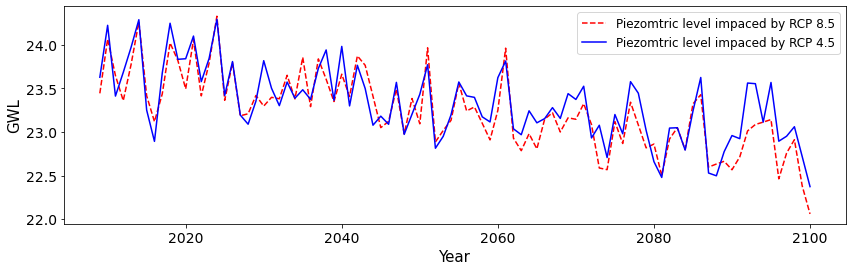

Ali Hanzouti


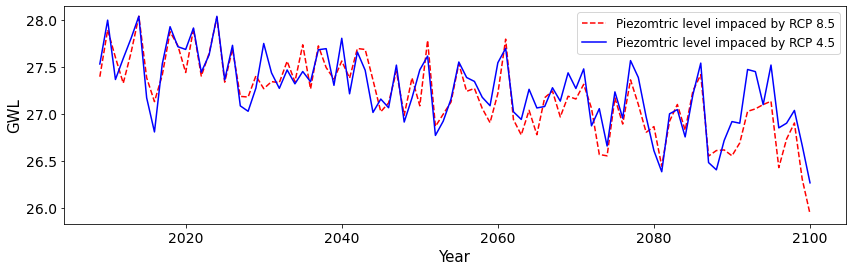

Puits Barrouta


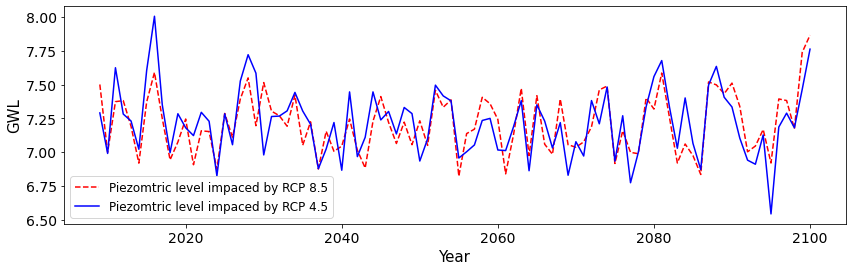

Ben Saad


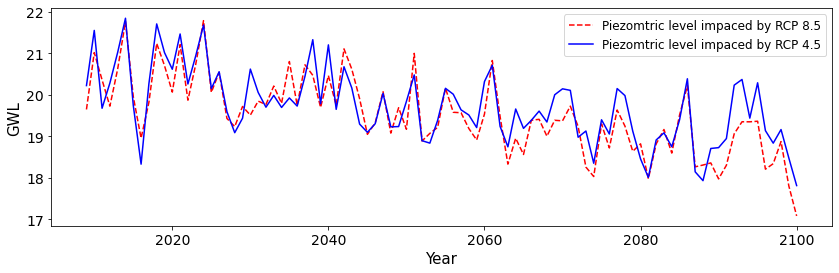

Ecole de Police


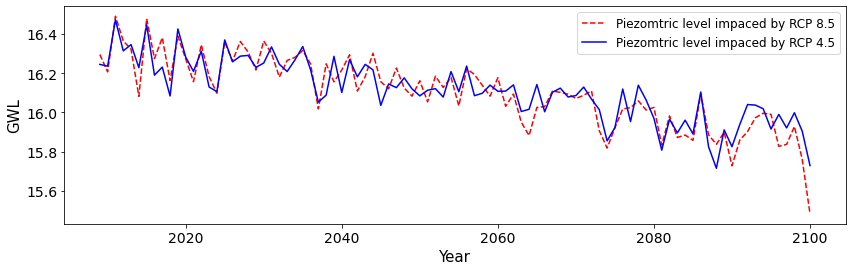

UCP Ouzra


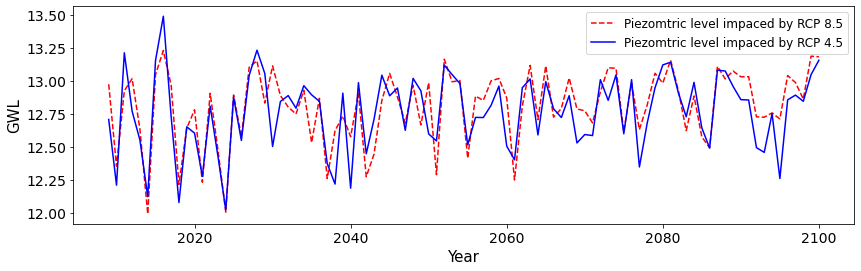

Salah Khamar


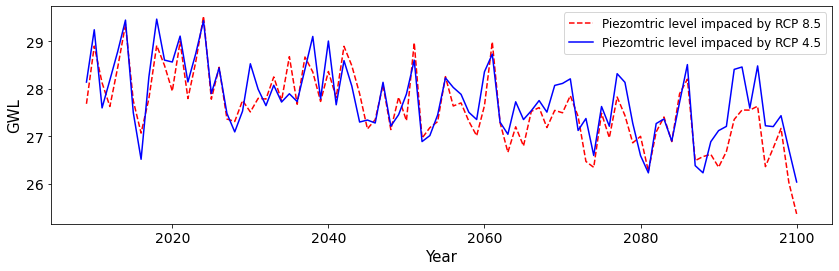

Haj Hadi Jani


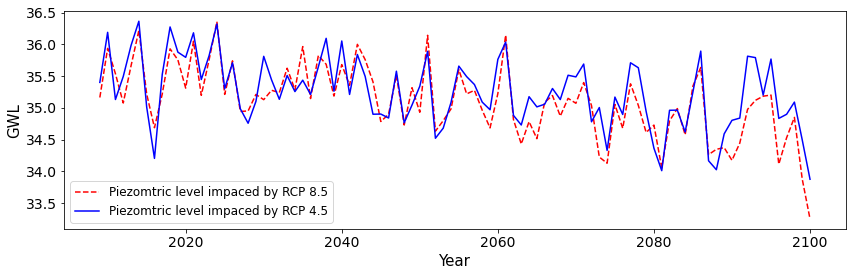

Azaiz ben Attia


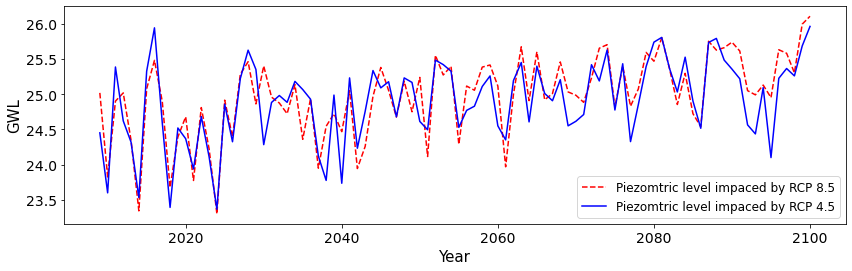

Delagi


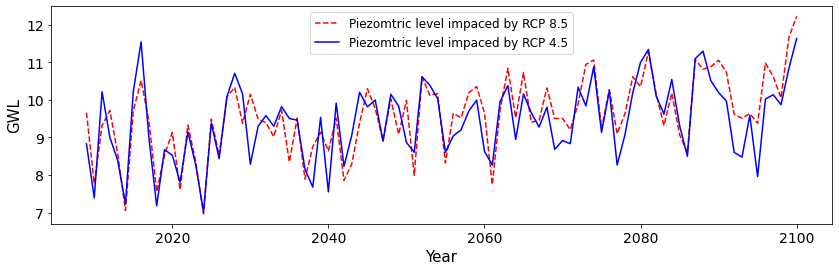

In [76]:
list_nom = RCP85.Piezometer.unique()
# list_nom=['Fraj']
# plt.rcParams['font.size'] = '16'
for d in list_nom:
    print(d)
    df=RCP85[(RCP85.Piezometer==d)]
    df1=RCP45[(RCP45.Piezometer==d)]
    plt.rcParams['figure.figsize'] = (14, 4)
    plt.rcParams['axes.grid'] = False
    plt.rcParams['font.size'] = '14'
    plt.plot(df.groupby(['Year'])['Pz'].mean(),'r--')
    plt.plot(df1.groupby(['Year'])['Pz'].mean(),'b')
    plt.legend(('Piezomtric level impaced by RCP 8.5','Piezomtric level impaced by RCP 4.5'),fontsize=12, loc = 0)
    plt.xlabel('Year',fontsize=15)
    plt.ylabel('GWL',fontsize=15)
    plt.grid
    plt.show()